# SCC0270 - Neural Networks and Deep Learning
## Implementation of an Autoencoder

# 1. Introduction

An autoencoder is a type of artificial neural network commonly used to learn efficient representations of data, typically for dimensionality reduction, data compression, or denoising (noise removal). It consists of two main parts: the encoder and the decoder.

The function of the encoder is to convert the input data into a compressed or encoded representation, usually in a space with lower dimensionality than the input space. This encoded representation captures the most important features of the input data. Then, the decoder receives the encoded representation of the data and attempts to reconstruct the original input from this representation. It performs the inverse process of the encoder, expanding the encoded representation back to the original dimensionality space.

During training, an autoencoder is fed with input data and optimized to minimize the difference between the original input and the reconstructed output. This is usually done using a loss function, such as the Mean Squared Error (MSE), which quantifies the difference between the input and the reconstructed output.

Autoencoders are a powerful tool in machine learning and are used in various applications, including pattern recognition, natural language processing, computer vision, and more.

# 2. Project Objective

The objective of this work is to implement an autoencoder using Python based on the concepts presented in class. The autoencoder should allow the user to define the architecture, that is, how many layers and how many neurons in each layer they wish to use.

# 3. Building the Autoencoder

## 3.1. Architecture Definition

To define the number of layers and neurons in each layer of the implemented autoencoder, we instantiate the **Autoencoder** class. The Autoencoder class has an __init__ method, which is the class constructor, where we can pass the necessary parameters to define the autoencoder's architecture.

In the command ```def __init__(self, layer_sizes, activation_name='tanh')``` the **layer_sizes** parameter is a list that specifies the number of neurons in each layer. The first element of the list represents the number of neurons in the input layer, the last element corresponds to the number of neurons in the output layer, and the intermediate elements define the number of neurons in each hidden layer. The **activation_name** parameter is a string that defines the activation function to be used in all layers of the autoencoder. The available activation function options are 'tanh' (Hyperbolic Tangent), 'sigmoid' (Sigmoid) and 'relu' (ReLU). This flexible approach allows users to configure the autoencoder's structure according to their specific requirements.


In [ ]:
# Libraries used
import numpy as np
import matplotlib.pyplot as plt


# We create the Autoencoder class
class Autoencoder:
    def __init__(self, layer_sizes, activation_name = 'tanh'):  # The Autoencoder class uses the tanh activation function by default
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = {}
        self.biases = {}
        self.activations = {}
        self.activation_name = activation_name

        # Define the activation function based on the input provided
        self.activation_func, self.activation_derivative = self.get_activation(activation_name)

        for i in range(1, self.num_layers):
            n_in = layer_sizes[i-1]
            n_out = layer_sizes[i]
            self.weights[i] = np.random.randn(n_out, n_in) / np.sqrt(n_in)
            self.biases[i] = np.zeros((n_out, 1))
        self.activations = self.activation_func  # Different activation functions can be used

    # Define activation functions and their respective derivatives
    def get_activation(self, activation_name):
        activations_func = {
            'tanh': (np.tanh, lambda x: (1 - x**2)),                                      # Hyperbolic tangent
            'sigmoid': (lambda x: 1 / (1 + np.exp(-x)), lambda x: x * (1 - x)),           # Sigmoid
            'relu': (lambda x: np.maximum(0, x), lambda x: np.where(x > 0, 1, 0))          # ReLU
       }
        return activations_func[activation_name]

    def forward(self, x):
        activations = {0: x}
        for i in range(1, self.num_layers):
            x = self.activations(np.dot(self.weights[i], x) + self.biases[i])
            activations[i] = x
        return activations

    def backward(self, x, activations):
        gradients = {}
        num_samples = x.shape[1]
        for i in range(self.num_layers - 1, 0, -1):
            if i == self.num_layers - 1:
                error = activations[i] - x
            else:
                error = np.dot(self.weights[i+1].T, gradients[i+1])
            gradients[i] = error * self.activation_derivative(activations[i])

        dW = {}
        db = {}
        for i in range(1, self.num_layers):
            dW[i] = np.dot(gradients[i], activations[i-1].T) / num_samples
            db[i] = np.sum(gradients[i], axis=1, keepdims=True) / num_samples

        return dW, db

    def update_parameters(self, dW, db, lr):
        for i in range(1, self.num_layers):
            self.weights[i] -= lr * dW[i]
            self.biases[i] -= lr * db[i]

    def train(self, x_train, lr=0.01, epochs=100, batch_size=32):
        x_train = x_train.reshape(-1,x_train.shape[1]*x_train.shape[2])

        losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(0, x_train.shape[0], batch_size):
                batch_x = x_train[i:i+batch_size].T
                activations = self.forward(batch_x)
                dW, db = self.backward(batch_x, activations)
                self.update_parameters(dW, db, lr)
                reconstruction = activations[self.num_layers - 1]
                loss = np.mean((reconstruction - batch_x) ** 2)
                epoch_loss += loss
            losses.append(epoch_loss / (x_train.shape[0] / batch_size))
            print("Epoch:", epoch+1, "Loss:", losses[-1])
        return losses

    def encode(self, x):
        x = x.reshape(-1,x.shape[1]*x.shape[2])
        activations = self.forward(x.T)
        return activations[self.num_layers // 2]

    def decode(self, encoded_x):
        activations = {self.num_layers // 2: encoded_x}
        for i in range(self.num_layers // 2 + 1, self.num_layers):
            encoded_x = self.activations(np.dot(self.weights[i], encoded_x) + self.biases[i])
            activations[i] = encoded_x
        return activations[self.num_layers - 1].T

    def calculate_loss(self, x_test): # Loss function = Mean squared error
        x_test = x_test.reshape(-1,x_test.shape[1]*x_test.shape[2])
        activations = self.forward(x_test.T)  # Pass the entire test set at once
        reconstruction = activations[self.num_layers - 1]
        average_loss = np.mean((reconstruction - x_test.T) ** 2)  # Calculate loss in a vectorized way
        return average_loss

## 3.2. Methods Defined in the Autoencoder Class

This code implements an autoencoder using NumPy, allowing customization of the autoencoder's architecture and activation function. It provides methods for training the model, generating encoded representations, and reconstructing original data. The methods defined in the Autoencoder class are as follows:

 ```get_activation```: Retrieves the activation function and its derivative based on the given name.

```forward```: Implements the forward propagation of the autoencoder. It calculates the outputs of each layer by applying activation functions to the weighted sum of inputs plus biases.

```backward```: Implements error backpropagation. It computes the gradients of weights and biases using the derivative of the activation function.

```update_parameters```: Updates the autoencoder's weights and biases based on the computed gradients and the learning rate.

```train```: Trains the autoencoder using the provided training data. It iterates through epochs and batches, computing the reconstruction error and updating model parameters. This method receives: "x_train" the dataset used to train the autoencoder, "lr" a parameter indicating the stopping criterion for the loss function (default is 0.01), "epochs" the number of training epochs (default is 100), "batch_size" the number of training examples propagated through the neural network at a time (default is 32).
        
```encode```: Receives input data and returns the encoded representation.

```decode```: Receives the encoded representation and returns the reconstructed original data.

```calculate_loss```: Receives a dataset in the same format as the autoencoder's training data and returns the loss function value (Mean Squared Error) for that dataset.


## 3.3. Normalizer Class
The **Normalizer** class is defined to normalize or standardize the training and testing data before using them in the Autoencoder class.

The Normalizer class receives a string that specifies the type of normalization to be applied to the data. The available options are 'min_max', 'standalization' and 'division_255'. It is important to note that the choice of normalization method depends on the specific problem. It is necessary to experiment with different methods to determine the most suitable approach for each case.

In [ ]:
class Normalizer:
    def __init__(self, type_normalize='min_max'):
        self.type_normalize = type_normalize

    def normalize(self, data):
        if self.type_normalize == 'min_max':
            return (data - np.min(data)) / (np.max(data) - np.min(data))  # Min-Max normalization
        elif self.type_normalize == 'standardization':
            return (data - np.mean(data)) / np.std(data)  # Standardization
        elif self.type_normalize == 'division_255':
            return data / 255  # Division by 255

    def fit_transform(self, data):
        return self.normalize(data)

An example of how to use the Normalizer class is shown below:
    # Instantiate the normalizer
    normalizer = Normalizer(type_normalize='min_max')

    # Normalize the training data
    x_train_normalized = normalizer.fit_transform(x_train)

    # Normalize the test data
    x_test_normalized = normalizer.fit_transform(x_test)

# 4. Examples of Autoencoder Testing

## 4.1. Example with mnist data using the hyperbolic tangent activation function (tanh)

Epoch: 1 Loss: 0.05143223650186908
Epoch: 2 Loss: 0.028664884078524844
Epoch: 3 Loss: 0.02324596191432756
Epoch: 4 Loss: 0.02031475264605631
Epoch: 5 Loss: 0.018457844645266116
Epoch: 6 Loss: 0.017139950807021118
Epoch: 7 Loss: 0.01614928499632051
Epoch: 8 Loss: 0.015431774202875916
Epoch: 9 Loss: 0.014872704137145695
Epoch: 10 Loss: 0.014353938077538668
Epoch: 11 Loss: 0.013992152156122819
Epoch: 12 Loss: 0.01368133499080515
Epoch: 13 Loss: 0.013385624966424748
Epoch: 14 Loss: 0.013170388593088497
Epoch: 15 Loss: 0.013005455265204888
Epoch: 16 Loss: 0.01283379117040297
Epoch: 17 Loss: 0.012709826216912678
Epoch: 18 Loss: 0.012631686906857804
Epoch: 19 Loss: 0.012523653728128997
Epoch: 20 Loss: 0.012459645001087004


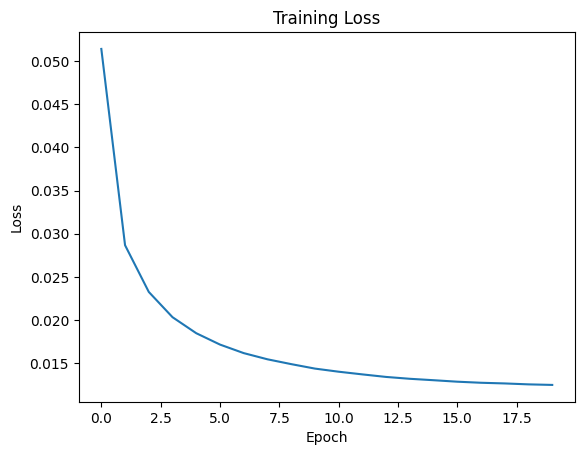

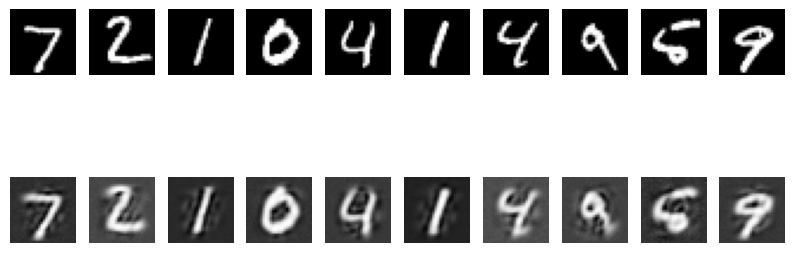

In [ ]:
# Define the number of neurons in each layer
layer_sizes = [784, 256, 64, 256, 784]

# Load and preprocess the data
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
normalizer = Normalizer(type_normalize='min_max')  # Instantiate the normalizer
x_train = normalizer.fit_transform(x_train)  # Normalize the training data
x_test = normalizer.fit_transform(x_test)  # Normalize the test data

# Create and train the autoencoder
autoencoder = Autoencoder(layer_sizes, 'tanh')
losses = autoencoder.train(x_train, lr=0.01, epochs=20, batch_size=128)

# Plot the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Encode and decode samples
encoded_samples = autoencoder.encode(x_test[:10])
decoded_samples = autoencoder.decode(encoded_samples)

# Plot the original and reconstructed samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## 4.1.1. Performance Evaluation

In [ ]:
# Loss on the test set
loss_train = autoencoder.calculate_loss(x_train)
loss_test = autoencoder.calculate_loss(x_test)
print(f'The loss for the test set is: {loss_test}')
if(loss_train != 0):
  dif_percent_test = abs(loss_test - loss_train) / loss_train
  print(f'The loss for the test set shows a difference of {round(dif_percent_test * 100, 4)}% compared to the training set loss')

A loss para o conjunto de teste é: 0.012451136489805986
A loss para o conjunto de teste apresenta uma diferença  de 2.2226 % para a loss do conjunto de treinamento


We noticed that the loss function progressively decreased with each epoch, which indicates that the model is learning to reconstruct the input data. The reconstructed images confirm this statement.

The percentage difference between the training loss and the test loss is calculated as 2.2226%, and it indicates similar results when applying the autoencoder to both the training and test sets. This difference, combined with a small loss on the test set, may indicate the model's ability to generalize to unseen data.

## 4.2. Example with MNIST Data Using the Sigmoid Activation Function

Epoch: 1 Loss: 0.07368295253198802
Epoch: 2 Loss: 0.06749878005484047
Epoch: 3 Loss: 0.0673858083238092
Epoch: 4 Loss: 0.06733711669427377
Epoch: 5 Loss: 0.06730337291278903
Epoch: 6 Loss: 0.06727182196876119
Epoch: 7 Loss: 0.06723501284923837
Epoch: 8 Loss: 0.0671840616943706
Epoch: 9 Loss: 0.06710302562467572
Epoch: 10 Loss: 0.06695659803541298
Epoch: 11 Loss: 0.06664945830685515
Epoch: 12 Loss: 0.06590251882013855
Epoch: 13 Loss: 0.06425241892500981
Epoch: 14 Loss: 0.06240020142541044
Epoch: 15 Loss: 0.06152246840834609
Epoch: 16 Loss: 0.061093355109045296
Epoch: 17 Loss: 0.06066056219250937
Epoch: 18 Loss: 0.05998148416632446
Epoch: 19 Loss: 0.05872227649450568
Epoch: 20 Loss: 0.057183914076134545


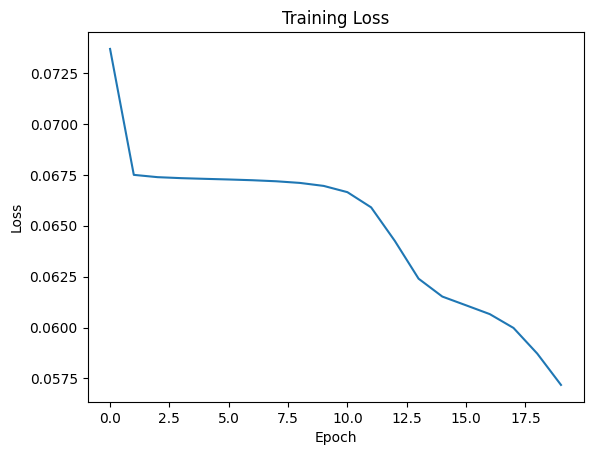

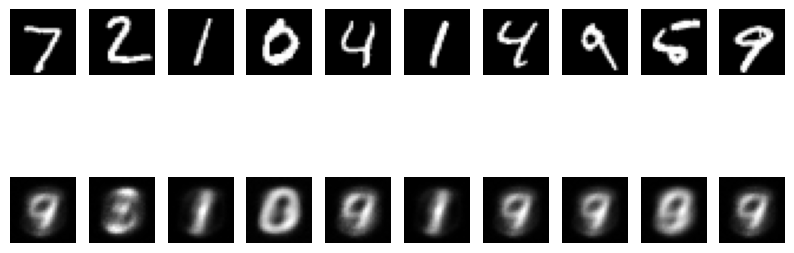

In [ ]:
# Define the number of neurons in each layer
layer_sizes = [784, 256, 64, 256, 784]

# Load and preprocess the data
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
normalizer = Normalizer(type_normalize='min_max')  # Instantiate the normalizer
x_train = normalizer.fit_transform(x_train)  # Normalize the training data
x_test = normalizer.fit_transform(x_test)  # Normalize the test data

# Create and train the autoencoder
autoencoder = Autoencoder(layer_sizes, 'sigmoid')
losses = autoencoder.train(x_train, lr=0.01, epochs=20, batch_size=128)

# Plot the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Encode and decode samples
encoded_samples = autoencoder.encode(x_test[:10])
decoded_samples = autoencoder.decode(encoded_samples)

# Plot the original and reconstructed samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## 4.2.1. Performance Evaluation

In [ ]:
# Loss on the test set
loss_train = autoencoder.calculate_loss(x_train)
loss_test = autoencoder.calculate_loss(x_test)
print(f'A loss para o conjunto de teste é: {loss_test}')
if(loss_train !=0):
  dif_percent_test = abs(loss_test - loss_train)/loss_train
  print(f'A loss para o conjunto de teste apresenta uma diferença  de {round(dif_percent_test*100,4)} % para a loss do conjunto de treinamento')

A loss para o conjunto de teste é: 0.05648663145798393
A loss para o conjunto de teste apresenta uma diferença  de 0.3242 % para a loss do conjunto de treinamento


In this example, the magnitude of the initial loss is higher than in the previous example. This may suggest that the model is facing more difficulty in learning to reconstruct the data, which is confirmed by the reconstructed images.

The loss on the test set is higher than in the previous example. However, the percentage difference between the training and test sets is smaller (0.3242%), indicating that the model is performing more similarly across both sets. This example clearly shows that it’s not ideal to rely on just one evaluation metric for models, as a smaller percentage difference between the performance on the training and test sets does not necessarily indicate that the model generalizes or performs better.

## 4.3. Example with MNIST Data Using the ReLU Activation Function

Epoch: 1 Loss: 0.05019279679855298
Epoch: 2 Loss: 0.03021183051122316
Epoch: 3 Loss: 0.02468950293277743
Epoch: 4 Loss: 0.021868725182229362
Epoch: 5 Loss: 0.020450099736995228
Epoch: 6 Loss: 0.019424600636353703
Epoch: 7 Loss: 0.018697251634300728
Epoch: 8 Loss: 0.017983256253648133
Epoch: 9 Loss: 0.017273812689517398
Epoch: 10 Loss: 0.01676178124922382
Epoch: 11 Loss: 0.01625544120083515
Epoch: 12 Loss: 0.015756633738089235
Epoch: 13 Loss: 0.015505088717227073
Epoch: 14 Loss: 0.015266427858453991
Epoch: 15 Loss: 0.014874450993300462
Epoch: 16 Loss: 0.01442755246132982
Epoch: 17 Loss: 0.01409507779820796
Epoch: 18 Loss: 0.013923638377010454
Epoch: 19 Loss: 0.013789124205431862
Epoch: 20 Loss: 0.013616561621060914


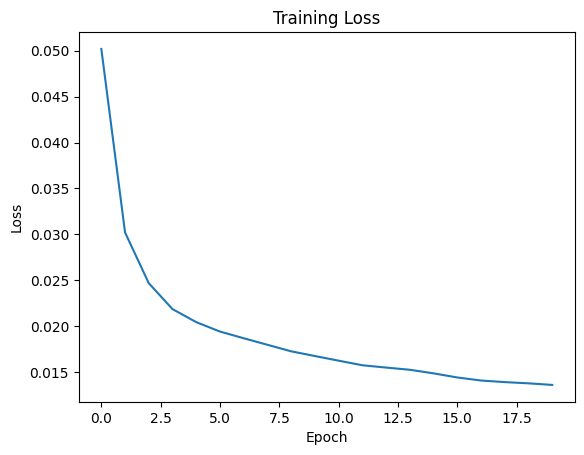

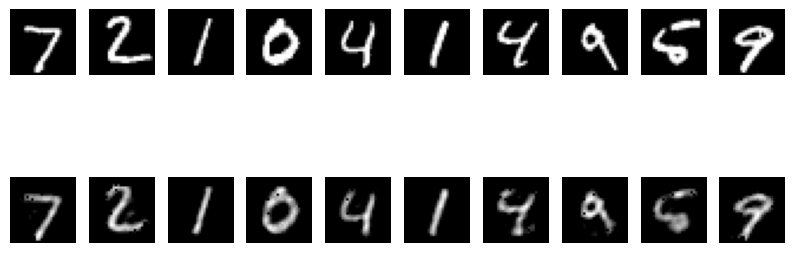

In [ ]:
# Define the number of neurons in each layer
layer_sizes = [784, 256, 64, 256, 784]

# Load and preprocess the data
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
normalizer = Normalizer(type_normalize='min_max')  # Instantiate the normalizer
x_train = normalizer.fit_transform(x_train)  # Normalize the training data
x_test = normalizer.fit_transform(x_test)  # Normalize the test data

# Create and train the autoencoder
autoencoder = Autoencoder(layer_sizes, 'relu')
losses = autoencoder.train(x_train, lr=0.01, epochs=20, batch_size=128)

# Plot the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Encode and decode samples
encoded_samples = autoencoder.encode(x_test[:10])
decoded_samples = autoencoder.decode(encoded_samples)

# Plot the original and reconstructed samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

## 4.3.1. Performance Evaluation

In [ ]:
# Loss on the test set
loss_train = autoencoder.calculate_loss(x_train)
loss_test = autoencoder.calculate_loss(x_test)
print(f'A loss para o conjunto de teste é: {loss_test}')
if(loss_train !=0):
  dif_percent_test = abs(loss_test - loss_train)/loss_train
  print(f'A loss para o conjunto de teste apresenta uma diferença  de {round(dif_percent_test*100,4)} % para a loss do conjunto de treinamento')

A loss para o conjunto de teste é: 0.013802009788759392
A loss para o conjunto de teste apresenta uma diferença  de 1.4245 % para a loss do conjunto de treinamento


The magnitude of the initial loss is similar to the first example, and its progression indicates that the model is learning to reconstruct the input data. The reconstructed images showed the best resolution among the three examples.

The percentage difference between the training and test loss was small, indicating that the model is achieving similar performance on both the training and test sets. It is important to note that the model performed well in dimensionality reduction. When comparing the resized image with the original, it is possible to notice the presence of the main features of the figures.

# 5. Conclusion of the Test Examples

The analysis of the examples with the MNIST data used the same architecture, with the same number of layers and neurons, the same normalization for the training and test data, and the same number of epochs. The only variation was in the activation function.

The example using the ReLU activation function demonstrated superior performance in image reconstruction compared to the other two examples. This suggests that ReLU might have been more suitable for this specific problem, allowing the model to better capture and represent the structure of the input data.

Different activation functions can impact the model's ability to learn and represent relationships in the data. For instance, the ReLU activation function is known to address the vanishing gradient problem, which likely contributed to the superior performance in the third example.

Although the third example stood out, it’s important to emphasize that the choice of activation function is not the only determinant of the model's performance. Other hyperparameters also play a crucial role. Further experimentation, including hyperparameter tuning and network architecture variations, may be necessary to further optimize the model's performance.